Code to do data descritpve analytics with an AI agent

In [20]:
# -*- coding: utf-8 -*-
"""Data Analysis Agent Notebook.ipynb

Automatically generated by Colaboratory.

Original file is located at
    [Your Colab Link Here - if applicable]
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json


read config file

In [21]:
# Load API Key and download directory from config file
CONFIG_FILE = "../config/api-call.json"

def load_config(config_path):
    """Load configuration from a JSON file."""
    with open(config_path, "r") as file:
        return json.load(file)
    
# Load config values
config = load_config(CONFIG_FILE)
# print(config)
API_ENDPOINT= config["ned"]["ned_api_endpoint"]
API_KEY = config["ned"]["demo-ned-api-key"]
DOWNLOAD_DIR = config["ned"]["ned_download_dir"]

csv_file_path = f'{DOWNLOAD_DIR}power-gen-consolidated-data-2022-2024.csv'

code to process data file

KeyboardInterrupt: 

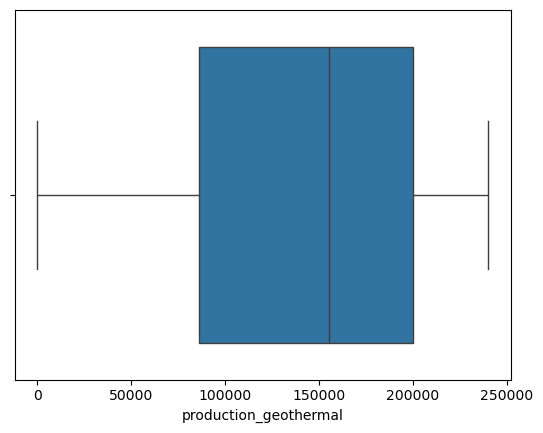

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from io import BytesIO
import os
import io
import uuid

class DataAnalyzerAgent:
    def __init__(self, config):
        self.config = config
        # self.filepath = config.get('filepath')
        self.filepath = csv_file_path
        self.html_output = ""
        self.df = None
        self.page_content = {}  # Store content for each page

    def load_data(self):
        if self.filepath is None:
            return False
        try:
            self.df = pd.read_csv(self.filepath)
            return True
        except FileNotFoundError:
            return False
        except Exception as e:
            return False

    def describe_data(self):
        if self.df is None:
            return

        buffer = io.StringIO()
        self.df.info(buf=buffer)
        info_str = buffer.getvalue()
        self.page_content["Data Info"] = f"<pre>{info_str}</pre>"
        self.page_content["Descriptive Statistics"] = self.df.describe().to_html()

    def visualize_data(self):
        if self.df is None:
            return

        numerical_cols = self.df.select_dtypes(include=['number']).columns
        categorical_cols = self.df.select_dtypes(include=['object', 'category']).columns

        def plot_to_base64(plot_func):
            buffer = BytesIO()
            plot_func()
            plt.savefig(buffer, format='png')
            buffer.seek(0)
            image_base64 = base64.b64encode(buffer.getvalue()).decode()
            plt.close()
            return f'<img src="data:image/png;base64,{image_base64}" />'

        plots = []
        if len(numerical_cols) > 0:
            plots.append(("Histograms", plot_to_base64(lambda: self.df[numerical_cols].hist(figsize=(15, 10)))))
            for col in numerical_cols:
                plots.append((f"Box Plot {col}", plot_to_base64(lambda: sns.boxplot(x=self.df[col]))))
            if len(numerical_cols) > 1:
                plots.append(("Pairplots", plot_to_base64(lambda: sns.pairplot(self.df[numerical_cols]))))

        if len(categorical_cols) > 0:
            for col in categorical_cols:
                plots.append((f"Count Plot {col}", plot_to_base64(lambda: sns.countplot(x=self.df[col]))))

        self.page_content["Plots"] = "".join([f"<h3>{title}</h3>{plot}" for title, plot in plots])

        self.page_content["Summary"] = self.generate_summary()

    def generate_summary(self):
        if self.df is None:
            return "<p>No data to summarize.</p>"

        summary = "<p>Based on the analysis:</p><ul>"
        numerical_cols = self.df.select_dtypes(include=['number']).columns
        categorical_cols = self.df.select_dtypes(include=['object', 'category']).columns

        if len(numerical_cols) > 0:
            summary += "<li>Numerical columns show distribution and relationships.</li>"
        else:
            summary += "<li>No numerical columns.</li>"

        if len(categorical_cols) > 0:
            summary += "<li>Categorical columns show category frequencies.</li>"
        else:
            summary += "<li>No categorical columns.</li>"
        summary += "</ul>"
        return summary

    def generate_html(self):
        nav_links = "".join([f'<a href="#{page}">{page}</a> | ' for page in self.page_content.keys()])
        nav_links = nav_links[:-3]  # Remove trailing " | "

        html_content = f"""
        <html>
        <head><title>Data Analysis Report</title></head>
        <body>
        <h1>Data Analysis Report</h1>
        <p>{nav_links}</p>
        """

        for page, content in self.page_content.items():
            html_content += f'<h2 id="{page}">{page}</h2>{content}'

        html_content += "</body></html>"
        return html_content

    def run_analysis(self):
        if self.load_data():
            self.describe_data()
            self.visualize_data()
            html_content = self.generate_html()
            filename = f"data_analysis_report_{uuid.uuid4()}.html"
            with open(filename, "w") as f:
                f.write(html_content)
            return filename
        else:
            return None

# Example usage:
config = {
    "filepath": "your_data.csv"  # Replace with your CSV file path.
}

analyzer = DataAnalyzerAgent(config)
html_file = analyzer.run_analysis()
print(html_file)